In [5]:
import pandas as pd
import json

In [6]:
results= json.load(open("../results/results.json", "r"))

results

[{'Model': 'gpt-5-2025-08-07',
  'Test Dataset': 'copa-en',
  'Accuracy': 0.996,
  'Language-Specific Scores': {'en': {'Accuracy': 0.996}}},
 {'Model': 'gpt-4o-2024-08-06',
  'Test Dataset': 'copa-en',
  'Accuracy': 0.988,
  'Language-Specific Scores': {'en': {'Accuracy': 0.988}}},
 {'Model': 'gpt-3.5-turbo-0125',
  'Test Dataset': 'copa-en',
  'Accuracy': 0.952,
  'Language-Specific Scores': {'en': {'Accuracy': 0.952}}},
 {'Model': 'gpt-4o-2024-08-06',
  'Test Dataset': 'copa-sl',
  'Accuracy': 0.97,
  'Language-Specific Scores': {'sl': {'Accuracy': 0.97}}},
 {'Model': 'dummy-most_frequent',
  'Test Dataset': 'copa-sr',
  'Accuracy': 0.5,
  'Language-Specific Scores': {'sr': {'Accuracy': 0.5}}},
 {'Model': 'dummy-stratified',
  'Test Dataset': 'copa-sl',
  'Accuracy': 0.484,
  'Language-Specific Scores': {'sl': {'Accuracy': 0.484}}},
 {'Model': 'dummy-stratified',
  'Test Dataset': 'copa-sr-tor',
  'Accuracy': 0.488,
  'Language-Specific Scores': {'sr-tor': {'Accuracy': 0.488}}},
 {'M

In [7]:
results_copa = []

lang_map = {
    "English": "en",
    "Croatian": "hr",
    "Serbian": "sr",
    "Slovenian": "sl",
    "Chakavian Dialect": "hr-ckm",
    "Macedonian": "mk",
    "Cerkno Dialect": "sl-cer",
    "Torlak Dialect": "sr-tor"
}

for x in results:
    cur_result = {}
    cur_result["Model"] = x["Model"]
    for lang in ["English", "Croatian", "Serbian", "Slovenian", "Macedonian", "Chakavian Dialect", "Cerkno Dialect", "Torlak Dialect"]:
        lang_code = lang_map[lang]
        if lang_code in x['Language-Specific Scores']:
            cur_result[f"{lang} (accuracy)"] = x['Language-Specific Scores'][lang_code]["Accuracy"]
    results_copa.append(cur_result)

temp_results_df = pd.DataFrame(results_copa)
temp_results_df

,Model,English (accuracy),Slovenian (accuracy),Serbian (accuracy),Torlak Dialect (accuracy),Chakavian Dialect (accuracy),Macedonian (accuracy),Croatian (accuracy),Cerkno Dialect (accuracy)
0,gpt-5-2025-08-07,0.996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gpt-4o-2024-08-06,0.988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,gpt-3.5-turbo-0125,0.952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,gpt-4o-2024-08-06,NaN,0.970,NaN,NaN,NaN,NaN,NaN,NaN
4,dummy-most_frequent,NaN,NaN,0.500,NaN,NaN,NaN,NaN,NaN
5,dummy-stratified,NaN,0.484,NaN,NaN,NaN,NaN,NaN,NaN
6,dummy-stratified,NaN,NaN,NaN,0.488,NaN,NaN,NaN,NaN
7,dummy-most_frequent,NaN,NaN,NaN,0.500,NaN,NaN,NaN,NaN
8,dummy-stratified,NaN,NaN,0.494,NaN,NaN,NaN,NaN,NaN
9,dummy-most_frequent,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN


In [8]:
merged_results = []

temp_results = temp_results_df.to_dict(orient="records")

for model in list(temp_results_df.Model.unique()):
	model_dict = {}
	model_dict["Model"] = model
	for x in temp_results:
		if x["Model"] == model:
			for lang in ["English", "Croatian", "Serbian", "Slovenian", "Macedonian", "Chakavian Dialect", "Cerkno Dialect", "Torlak Dialect"]:
				if x[f"{lang} (accuracy)"] >= 0:
					model_dict[f"{lang} (accuracy)"] = x[f"{lang} (accuracy)"]
	merged_results.append(model_dict)

results_df = pd.DataFrame(merged_results)
results_df

,Model,English (accuracy),Slovenian (accuracy),Serbian (accuracy),Torlak Dialect (accuracy),Chakavian Dialect (accuracy),Macedonian (accuracy),Cerkno Dialect (accuracy),Croatian (accuracy)
0,gpt-5-2025-08-07,0.996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gpt-4o-2024-08-06,0.988,0.970,NaN,NaN,NaN,NaN,NaN,NaN
2,gpt-3.5-turbo-0125,0.952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,dummy-most_frequent,0.500,0.500,0.500,0.500,0.5,0.500,0.500,0.500
4,dummy-stratified,0.518,0.484,0.494,0.488,0.5,0.518,0.528,0.512
5,qwen3:32b,0.972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,gemma3:27b,0.970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,llama3.3:latest,0.986,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
results_df.to_json("results.json", orient="records", lines=True)

# Plot a bar plot

In [10]:
import pandas as pd

In [11]:
results_df = pd.read_json("results.json", orient="records", lines=True)

In [12]:
results_df

,Model,English (accuracy),Slovenian (accuracy),Serbian (accuracy),Torlak Dialect (accuracy),Chakavian Dialect (accuracy),Macedonian (accuracy),Cerkno Dialect (accuracy),Croatian (accuracy)
0,gpt-5-2025-08-07,0.996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gpt-4o-2024-08-06,0.988,0.970,NaN,NaN,NaN,NaN,NaN,NaN
2,gpt-3.5-turbo-0125,0.952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,dummy-most_frequent,0.500,0.500,0.500,0.500,0.5,0.500,0.500,0.500
4,dummy-stratified,0.518,0.484,0.494,0.488,0.5,0.518,0.528,0.512
5,qwen3:32b,0.972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,gemma3:27b,0.970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,llama3.3:latest,0.986,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
results_df = results_df[~results_df["Model"].isin( ["dummy-stratified"])]

In [17]:
rename_dict = {
    "gpt-4o-2024-08-06": "GPT-4o",
    "gpt-3.5-turbo-0125": "GPT-3.5-Turbo",
    "gpt-4o-mini-2024-07-18": "GPT-4o-mini",
    "gemma3:27b": "Gemma 3",
    "gemma2:27b": "Gemma 2",
    "llama3.3:latest": "LLaMA 3.3",
    "deepseek-r1:14b": "DeepSeek-R1-Distill",
    "dummy-most_frequent": "Dummy (Frequent)",
    "X-GENRE classifier": "Fine-Tuned XLM-R",
    "SVC": "Support Vector Machine",
    "COMPLEMENTNB": "Naive Bayes Classifier",
    "XLM-R-ParlaSent": "Fine-Tuned BERT-Like Model",
    "gpt-5-mini-2025-08-07": "GPT-5-mini",
    "gpt-5": "GPT-5",
    "gpt-5-2025-08-07": "GPT-5",
    "gpt-5-nano-2025-08-07": "GPT-5-Nano",
    "llama4:scout": "LLaMA 4 Scout",
    "qwen3:32b": "Qwen 3",
    'google/gemini-2.5-flash-lite': "Gemini 2.5 Flash Lite",
    'google/gemini-2.5-flash': "Gemini 2.5 Flash",
    'mistralai/mistral-medium-3.1': "Mistral Medium 3.1",
    'mistralai/mistral-small-3.2-24b-instruct': "Mistral Small 3.2",
    'cohere/command-a': "Command A"
    # Add more if needed
}

# Apply the renaming
results_df["Model"] = results_df["Model"].replace(rename_dict)

# Change the order of columns

#results_df = results_df[['Model', 'Croatian (macro-F1)', 'Croatian (micro-F1)', 'Serbian (macro-F1)',
#       'Serbian (micro-F1)', 'Bosnian (macro-F1)', 'Bosnian (micro-F1)','English (macro-F1)', 'English (micro-F1)',]]

results_df

/tmp/ipykernel_1533622/1544726222.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df["Model"] = results_df["Model"].replace(rename_dict)


,Model,English (accuracy),Slovenian (accuracy),Serbian (accuracy),Torlak Dialect (accuracy),Chakavian Dialect (accuracy),Macedonian (accuracy),Cerkno Dialect (accuracy),Croatian (accuracy)
0,GPT-5,0.996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GPT-4o,0.988,0.97,NaN,NaN,NaN,NaN,NaN,NaN
2,GPT-3.5-Turbo,0.952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dummy (Frequent),0.500,0.50,0.5,0.5,0.5,0.5,0.5,0.5
5,Qwen 3,0.972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Gemma 3,0.970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,LLaMA 3.3,0.986,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
print(results_df.sort_values(by="English (accuracy)", ascending=False).to_markdown(index=False))

| Model            |   English (accuracy) |   Slovenian (accuracy) |   Serbian (accuracy) |   Torlak Dialect (accuracy) |   Chakavian Dialect (accuracy) |   Macedonian (accuracy) |   Cerkno Dialect (accuracy) |   Croatian (accuracy) |
|:-----------------|---------------------:|-----------------------:|---------------------:|----------------------------:|-------------------------------:|------------------------:|----------------------------:|----------------------:|
| GPT-5            |                0.996 |                 nan    |                nan   |                       nan   |                          nan   |                   nan   |                       nan   |                 nan   |
| GPT-4o           |                0.988 |                   0.97 |                nan   |                       nan   |                          nan   |                   nan   |                       nan   |                 nan   |
| LLaMA 3.3        |                0.986 |                 

In [ ]:
# Get a selection of models

#results_df = results_df[results_df["Model"].isin(['Gemini 2.5 Flash', 'GPT-5','GPT-4o', 'Mistral Medium 3.1', 'LLaMA 3.3', 'Gemma 3', 'GPT-3.5-Turbo', 'Qwen 3', 'DeepSeek-R1-Distill',  'Dummy (Frequent)'])]

#results_df.sort_values(by="Model", ascending=True)

<module 'matplotlib.pyplot' from '/home/tajak/miniconda3/envs/emma_main/lib/python3.9/site-packages/matplotlib/pyplot.py'>

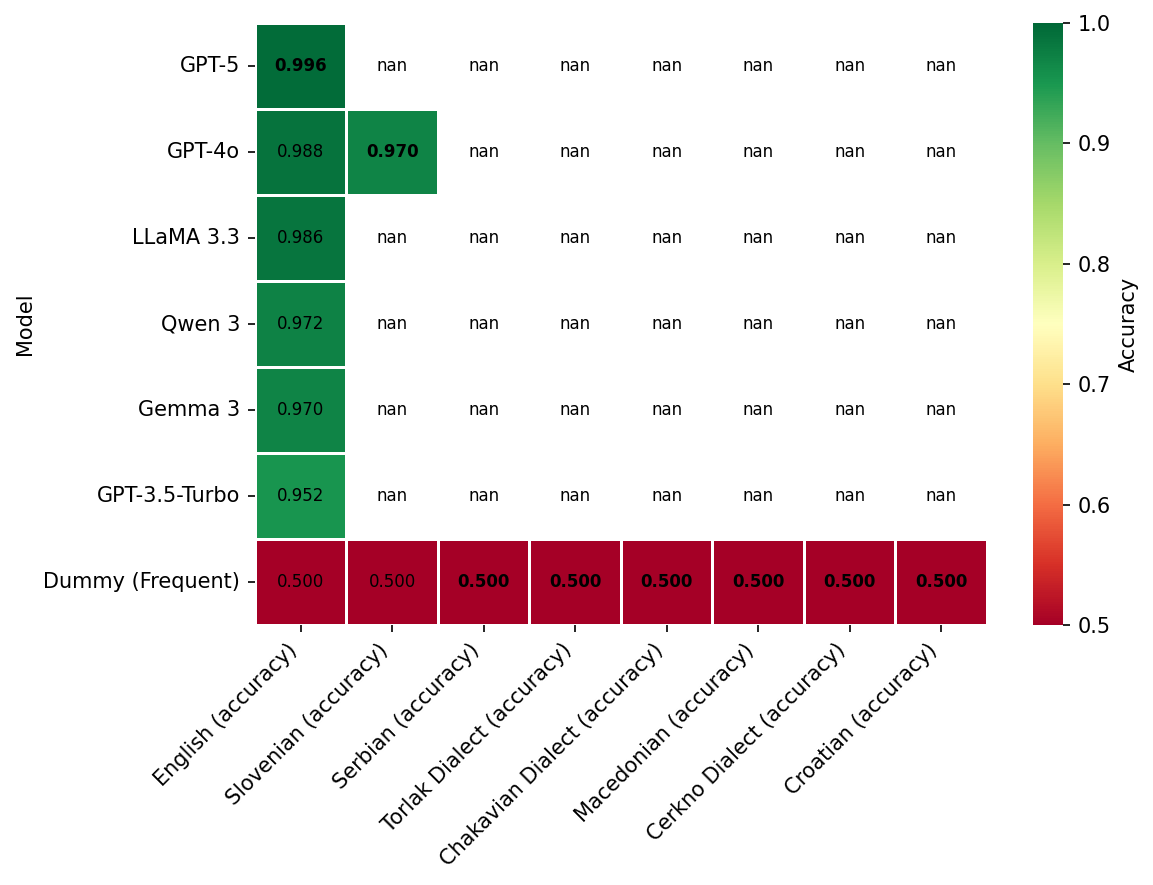

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set figure size and DPI
plt.figure(figsize=(8, 6), dpi=150)

# Prepare data
data = results_df.set_index("Model").sort_values(by="English (accuracy)", ascending=False)

# Create heatmap without annotations
ax = sns.heatmap(
    data,
    annot=False,  # We'll add custom annotations manually
    fmt=".3f",
    cmap="RdYlGn",
    vmin=0.5,  # Raise the minimum value for lighter backgrounds
    vmax=1,  # Max at 1.0
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Accuracy'}
)

# Add custom text annotations
for x in range(data.shape[1]):  # columns
    col = data.iloc[:, x]
    max_val = col.max()
    for y in range(data.shape[0]):  # rows
        val = col.iloc[y]
        text = f"{val:.3f}"
        if val == max_val:
            ax.text(x + 0.5, y + 0.5, text,
                    ha='center', va='center', fontweight='bold', fontsize=8)
        else:
            ax.text(x + 0.5, y + 0.5, text,
                    ha='center', va='center', fontsize=8)

# Tweak layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the figure
plt.savefig("copa-results-heatmap.png", dpi=300)
plt


In [26]:
# GPT comparison

results_gpt = results_df[~results_df["Model"].isin(["Dummy (Frequent)",])]#'DeepSeek-R1-Distill'])]

results_transposed = results_gpt.set_index(results_gpt["Model"]).drop(columns=["Model"]).transpose()

# Set the order
results_transposed = results_transposed[['GPT-3.5-Turbo', 'GPT-4o', 'GPT-5', 'Gemma 3', 'LLaMA 3.3', 'Qwen 3']]
#results_transposed = results_transposed[['GPT-3.5-Turbo', 'GPT-4o', 'GPT-5', 'Mistral Medium 3.1', 'Gemini 2.5 Flash','Gemma 3', 'LLaMA 3.3', 'Qwen 3']]

results_transposed

Model,GPT-3.5-Turbo,GPT-4o,GPT-5,Gemma 3,LLaMA 3.3,Qwen 3
English (accuracy),0.952,0.988,0.996,0.97,0.986,0.972
Slovenian (accuracy),NaN,0.970,NaN,NaN,NaN,NaN
Serbian (accuracy),NaN,NaN,NaN,NaN,NaN,NaN
Torlak Dialect (accuracy),NaN,NaN,NaN,NaN,NaN,NaN
Chakavian Dialect (accuracy),NaN,NaN,NaN,NaN,NaN,NaN
Macedonian (accuracy),NaN,NaN,NaN,NaN,NaN,NaN
Cerkno Dialect (accuracy),NaN,NaN,NaN,NaN,NaN,NaN
Croatian (accuracy),NaN,NaN,NaN,NaN,NaN,NaN


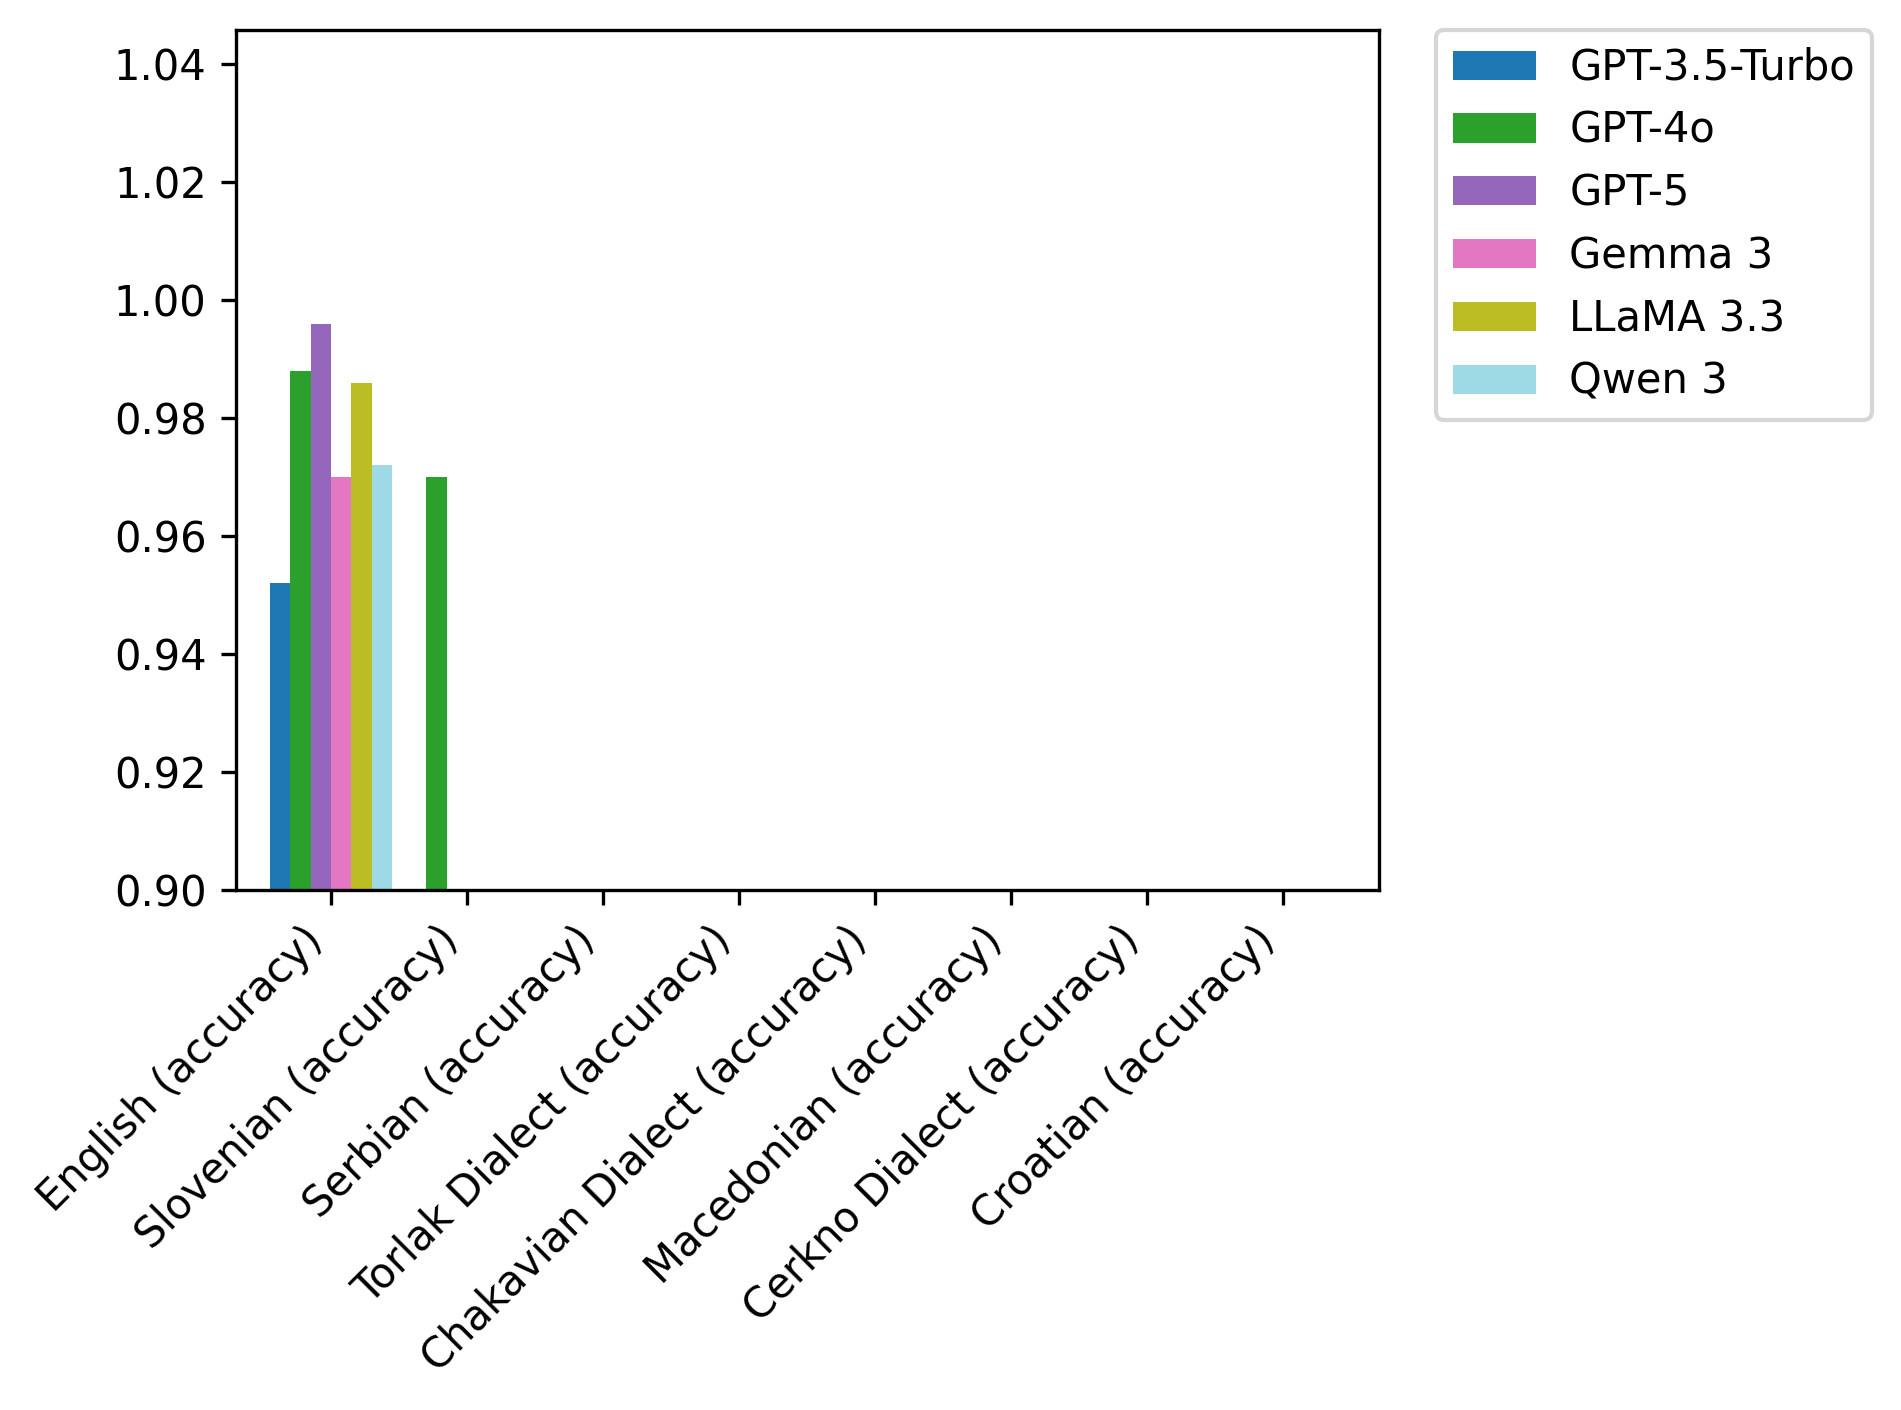

In [28]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 300 

ax = results_transposed.plot(kind="bar", width=0.9,colormap="tab20")

# Move legend outside
ax.legend(
    bbox_to_anchor=(1.05, 1),  # Position legend to the right
    loc='upper left',          # Anchor point
    borderaxespad=0
)

ax.set_ylim(0.9, None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

plt.tight_layout()  # Adjust layout so nothing is cut off
plt.savefig("gpt_comparison.png", dpi=300)
plt.show()


## Analyse precentage of Mix labels

In [38]:
import os

In [58]:
submission_folder = "systems/local-GPT-models/submissions"

In [59]:
def add_predictions_to_dataset(dataset_name, results):
    """The function takes the dataset name and dataset dictionary and returns test dataset with predictions.
    Args:
    - dataset_name: should be "ParlaSent-EN-test" or "ParlaSent-BCS-test"
    """
    # Load the dataset
    if dataset_name == "ParlaSent-EN-test":
        test_df = pd.read_json("datasets/ParlaSent-EN-test/ParlaSent_EN_test.jsonl", lines=True)
    elif dataset_name == "ParlaSent-BCS-test":
        test_df = pd.read_json("datasets/ParlaSent-BSC-test/ParlaSent_BCS_test.jsonl", lines=True)

    # Extract predictions
    y_pred = results["predictions"][0]["predictions"]
    test_df["y_pred"] = y_pred

    return test_df

In [60]:
# Get paths to all the submission files
submission_files = os.listdir(submission_folder)

submission_files

['submission-deepseek-r1:14b-ParlaSent-EN-test.json',
 'submission-llama3.3:latest-ParlaSent-EN-test.json',
 'submission-gemma3:27b-ParlaSent-EN-test.json',
 'submission-gemma3:27b-ParlaSent-BCS-test.json']

In [50]:
os.chdir("..")

In [61]:
# Evaluate all submissions in the submissions directory
for submission_file in submission_files:
	# Use only files that start with "submission"
	if "submission-" in submission_file:
		# Open the submission to be evaluated
		with open("{}/{}".format(submission_folder,submission_file), "r") as sub_file:
			results = json.load(sub_file)
			# Get information on the dataset and the model
			model = results["system"]

			dataset_name = results["predictions"][0]["test"]

			test_df = add_predictions_to_dataset(dataset_name, results)
			
			print(model)
			print(dataset_name)
			print(test_df["y_pred"].value_counts(normalize=True))

deepseek-r1:14b
ParlaSent-EN-test
y_pred
Negative    0.476154
Positive    0.265385
Neutral     0.258462
Name: proportion, dtype: float64
llama3.3:latest
ParlaSent-EN-test
y_pred
Neutral     0.390000
Negative    0.305769
Positive    0.304231
Name: proportion, dtype: float64
gemma3:27b
ParlaSent-EN-test
y_pred
Neutral     0.464231
Negative    0.274231
Positive    0.261538
Name: proportion, dtype: float64
gemma3:27b
ParlaSent-BCS-test
y_pred
Neutral     0.510385
Negative    0.343846
Positive    0.145769
Name: proportion, dtype: float64
